In [2]:
 # Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Load the dataset
df = pd.read_csv("D600 Task 2 Dataset 1 Housing Information.csv")

In [4]:
# Select relevant columns
df_logit = df[['IsLuxury', 'SquareFootage', 'NumBedrooms']].copy() 

In [5]:
# Descriptive statistics for continuous variables only
print("Descriptive Statistics for Continuous Variables:")
print(df_logit[['SquareFootage', 'NumBedrooms']].describe())

Descriptive Statistics for Continuous Variables:
       SquareFootage  NumBedrooms
count    7000.000000  7000.000000
mean     1048.947459     3.008571
std       426.010482     1.021940
min       550.000000     1.000000
25%       660.815000     2.000000
50%       996.320000     3.000000
75%      1342.292500     4.000000
max      2874.700000     7.000000


In [6]:
# Frequency count for binary dependent variable
print("\nFrequency Count for Categorical Variable (IsLuxury):")
print(df_logit['IsLuxury'].value_counts())


Frequency Count for Categorical Variable (IsLuxury):
IsLuxury
1    3528
0    3472
Name: count, dtype: int64


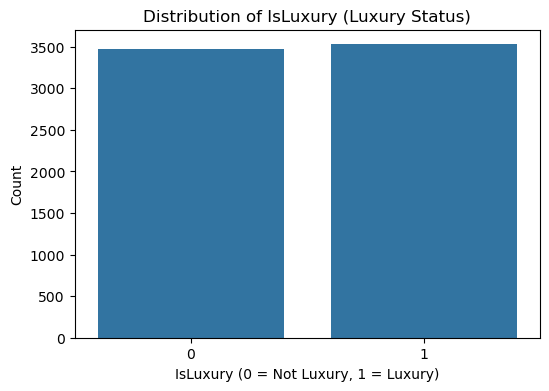

In [7]:
# 🔢 Frequency distribution of the dependent variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df_logit, x='IsLuxury')
plt.title('Distribution of IsLuxury (Luxury Status)')
plt.xlabel('IsLuxury (0 = Not Luxury, 1 = Luxury)')
plt.ylabel('Count')
plt.show()

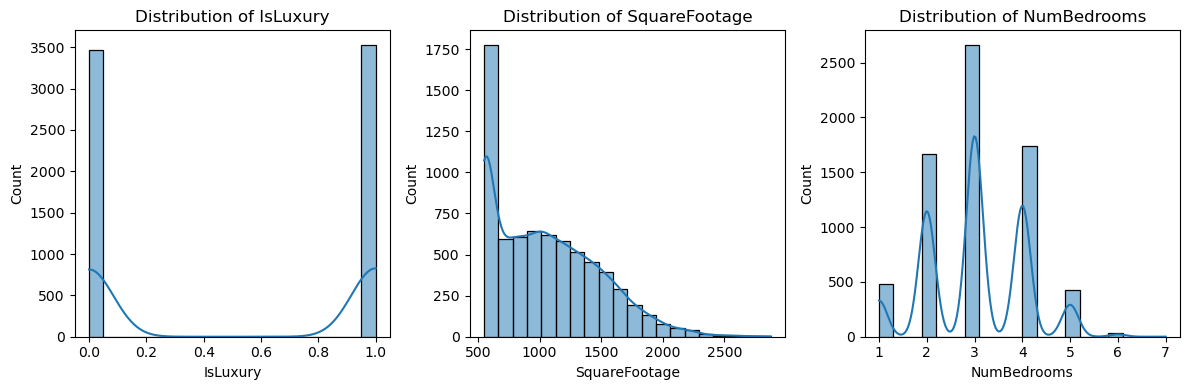

In [13]:
# Univariate Visualizations
plt.figure(figsize=(12, 4))
for i, col in enumerate(df_logit.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_logit[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

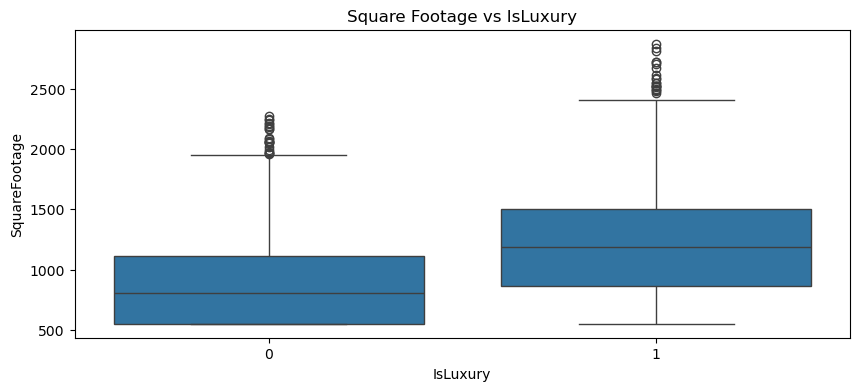

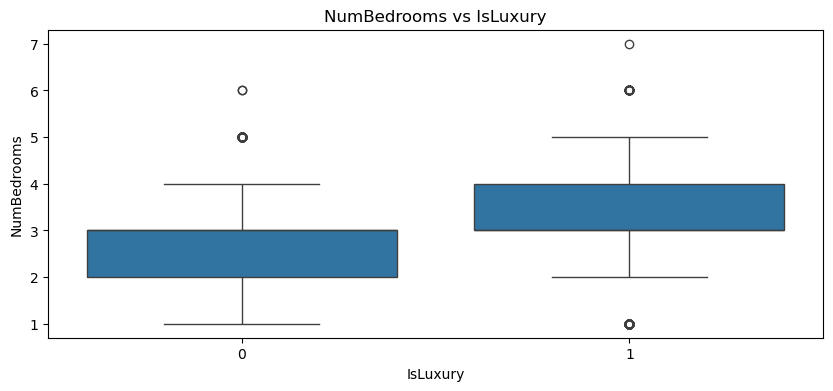

In [16]:
 # Bivariate Visualizations
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_logit, x='IsLuxury', y='SquareFootage')
plt.title('Square Footage vs IsLuxury')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_logit, x='IsLuxury', y='NumBedrooms')
plt.title('NumBedrooms vs IsLuxury')
plt.show()

In [18]:
#  Split the data (80% training, 20% testing)
X = df_logit[['SquareFootage', 'NumBedrooms']]
y = df_logit['IsLuxury']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Save the training and test datasets to CSV files for submission
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [22]:
# Backward Elimination Function
def backward_elimination(X, y, threshold=0.05):
    features = list(X.columns)
    while True:
        X_const = sm.add_constant(X[features])
        model = sm.Logit(y, X_const).fit(disp=0)
        p_values = model.pvalues.iloc[1:]  # skip constant
        max_p = p_values.max()
        if max_p > threshold:
            features.remove(p_values.idxmax())
        else:
            break
    return features, model

In [24]:
#  Run Backward Elimination
selected_features, optimized_model = backward_elimination(X_train, y_train)

In [26]:
# Display the summary of the optimized logistic regression model
print(optimized_model.summary2())

                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: IsLuxury         Pseudo R-squared: 0.171      
Date:               2025-05-29 22:52 AIC:              6437.6559  
No. Observations:   5600             BIC:              6457.5474  
Df Model:           2                Log-Likelihood:   -3215.8    
Df Residuals:       5597             LL-Null:          -3881.2    
Converged:          1.0000           LLR p-value:      1.0923e-289
No. Iterations:     6.0000           Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -4.1645   0.1382 -30.1400 0.0000 -4.4354 -3.8937
SquareFootage      0.0020   0.0001  24.5364 0.0000  0.0018  0.0021
NumBedrooms        0.7200   0.0324  22.2271 0.0000  0.6565  0.7834



In [28]:
# Add a constant to the training set
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.574255
         Iterations 6


In [30]:
#  Training Performance
y_train_pred = logit_model.predict(X_train_sm) > 0.5
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nTraining Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_conf_matrix)


Training Accuracy: 0.7157142857142857
Training Confusion Matrix:
 [[2010  755]
 [ 837 1998]]


In [32]:
 # D4: Prediction Results on Test Set
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
logit_model = sm.Logit(y_train, X_train_sm).fit()
y_test_pred_prob = logit_model.predict(X_test_sm)
y_test_pred_binary = [1 if prob > 0.5 else 0 for prob in y_test_pred_prob]

# Create DataFrame showing actual vs. predicted
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted_Probability': y_test_pred_prob,
    'Predicted': y_test_pred_binary
})

print("\nD4 Prediction Results:")
print(results_df.head(10))  # Show first 10 rows

Optimization terminated successfully.
         Current function value: 0.574255
         Iterations 6

D4 Prediction Results:
      Actual  Predicted_Probability  Predicted
6500       1               0.725551          1
2944       0               0.342758          0
2024       0               0.282768          0
263        0               0.160834          0
4350       1               0.869377          1
3424       0               0.398535          0
6748       1               0.967203          1
6215       0               0.752959          1
6362       1               0.406199          0
5589       1               0.322255          0


In [34]:
# VIF for Assumption Checks
X_vif = sm.add_constant(X)
vif_df = pd.DataFrame()
vif_df["feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVIF Data:")
print(vif_df)


VIF Data:
         feature        VIF
0          const  14.564638
1  SquareFootage   1.007749
2    NumBedrooms   1.007749


In [36]:
# Check unique values of the dependent variable
print(df['IsLuxury'].unique())

[0 1]


In [38]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [40]:
 # Show first 10 rows of the dataset
print(df.head(10))

# Show the shape (rows, columns)
print(f"\nThis dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

     ID        Price  SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace  \
0  4922  255614.8992         566.62      1.000000            4         779.42   
1  5009  155586.0947        1472.34      1.000000            2         656.13   
2  4450  131050.8324         550.00      1.779354            3         754.57   
3  1070  151361.7125         941.81      2.035254            2         439.59   
4   400  113167.6128         550.00      1.064644            3         353.03   
5  5979  224973.4118        1474.99      1.857532            2         774.45   
6  3703  169471.5239        1069.49      1.230458            3         757.58   
7  2260  265497.8918         550.00      1.000000            1         636.64   
8  6739  146559.7638         550.00      1.000000            4         603.68   
9  2469  148126.1958         983.26      1.000000            2         206.33   

   CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  ...  \
0      20.56          5.62      39.46   

In [42]:
  # Test Performance
X_test_sm = sm.add_constant(X_test)
y_test_pred = logit_model.predict(X_test_sm) > 0.5
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_conf_matrix)


Test Accuracy: 0.7192857142857143
Test Confusion Matrix:
 [[522 185]
 [208 485]]


In [44]:
# Display the full summary 
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5597
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.1714
Time:                        22:52:08   Log-Likelihood:                -3215.8
converged:                       True   LL-Null:                       -3881.2
Covariance Type:            nonrobust   LLR p-value:                1.092e-289
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.1645      0.138    -30.140      0.000      -4.435      -3.894
SquareFootage     0.0020   7.95e-05     24.536      0.000       0.002       0.002
NumBedrooms       0.7200      0.032     

In [53]:
# Final Logistic Regression Equation
print("\nLogit(IsLuxury) = {:.4f} + {:.4f} * SquareFootage + {:.4f} * NumBedrooms".format(
    logit_model.params['const'],
    logit_model.params['SquareFootage'],
    logit_model.params['NumBedrooms']))



Logit(IsLuxury) = -4.1645 + 0.0020 * SquareFootage + 0.7200 * NumBedrooms
